# **The main objective of this notebook is to build a Convolutional Neural Network (CNN) using the UTKFace dataset to perform binary classification.**



Dataset Link:
*  https://huggingface.co/datasets/py97/UTKFace-Cropped?utm_source=chatgpt.com


I am going to use google collab for training of model, you can use own IDE for this model.

In [1]:
# Mounting drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.listdir("/content/drive/My Drive")

['DriveSharer',
 'Kolop',
 'GDToT',
 'WhatsApp Image 2024-12-20 at 22.40.37_fcdc2f8a.jpg',
 'Colab Notebooks',
 'WhatsApp Image 2025-02-08 at 20.49.09_02e7cb53.jpg',
 'Copy of VC_RedistInstaller.exe',
 'To-do list.gsheet',
 'Google sheets',
 'Untitled spreadsheet.gsheet',
 'changed data type(numeric) (2).xlsx',
 'changed data type(numeric) (1).xlsx',
 'changed data type(numeric).xlsx',
 'changed data type(numeric).gsheet',
 'df_78_data.xlsx',
 'pratice sheet.gsheet',
 'Ask Gemini about the role of pyhton in plant bree... (5).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (4).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (3).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (2).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (1).gdoc',
 'Ask Gemini about the role of pyhton in plant bree....gdoc',
 'Emails to different stakeholders.gdoc',
 'mmem.jpg',
 'Tableau',
 'Learner-facing C3 Automatidata dataset for Tableau project (2).gshe

### Below mentioned code is used to extract dataset from zip file in google drive

Below code can only be used once

In [ ]:
import tarfile
import os

# Path to cnn folder
cnn_path = '/content/drive/My Drive/Dl Models/CNN/'

# Path to your .tar.gz file
file_path = os.path.join(cnn_path, 'UTKFace.tar.gz')

# Path to your manually created UTKFace folder
dataset_folder = os.path.join(cnn_path, 'UTKFace')

# Extract the dataset correctly
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=dataset_folder)

print("File Extraction Completed into:", dataset_folder)



## As this is picture based dataset so there must be different ways to check it out problems in it.

#### Getting exact location of folder


In [4]:
cnn_folder = '/content/drive/My Drive/Dl Models/CNN'
print(os.listdir(cnn_folder))

['UTKFace.tar.gz', 'UTKFace', 'CNN_Binary.ipynb']


#### Checking fist few images

In [5]:
folder = '/content/drive/My Drive/Dl Models/CNN/UTKFace'
all_images = [f for f in os.listdir(folder) if f.endswith('.jpg')]
print("Total Images Found:", len(all_images))
print('First Few Images:', all_images[:5])

Total Images Found: 23315
First Few Images: ['55_1_3_20170119171332121.jpg.chip.jpg', '55_1_3_20170119195255556.jpg.chip.jpg', '55_1_3_20170119192720664.jpg.chip.jpg', '55_1_3_20170119180703420.jpg.chip.jpg', '55_1_3_20170119175053900.jpg.chip.jpg']


### Checking corrputed Images

In [ ]:
import cv2

bad_images=[]

for f in all_images:
 img = cv2.imread(img_path)
   if img is None:
    bad_images.append(f)

print("Bad images found:", len(bad_images))
if bad_images:
  print("Example of corrupted images:", bad_images[:5])

There is no missing image

### Checking incorrect file names

In [7]:
wrong_names = [f for f in all_images if len(f.split('_')) < 4]
print("Incorrectly name files:", len(wrong_names))
if wrong_names:
  print("Example of bad names:", wrong_names[:5])

Incorrectly name files: 0


These files are very few so they can be deleted without any issue

In [8]:
# Deleting incorreclty named files
for f in wrong_names:
  file_path = os.path.join(folder, f)
  if os.path.exists(file_path):
    os.remove(file_path)
    print("Incorrectly files deleted:", f)



In [9]:
# Confirming deleting
wrong_names = [f for f in os.listdir(folder) if len(f.split("_")) < 4]
print("Incorrelty named files left:", len(wrong_names))

Incorrelty named files left: 0


### Checking Labels Range

In [10]:

all_images = [f for f in os.listdir(folder) if f.endswith('.jpg')]
ages=[]
genders = []
races = []

for f in all_images:
  try:
    a, g, r, _ = f.split('_')
    ages.append(int(a))
    genders.append(int(g))
    races.append(int(r))
  except:
    continue

print("Age range:", min(ages), "-", max(ages))
print("Gender Values:", set(genders))
print("Race Values:", set(races))


Age range: 1 - 116
Gender Values: {0, 1}
Race Values: {0, 1, 2, 3, 4}


### Checking image size

In [11]:
image_shapes = []
for f in all_images[:30]:
  img_path = os.path.join(folder, f)
  img = cv2.imread(img_path)
  if img is not None:
    image_shapes.append(img.shape)

print('Examples of image size:', image_shapes)


Examples of image size: [(200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3)]


### Checking for duplicated name

In [12]:

unique_names = set(all_images)
print("Total images:", len(all_images))
print('Unique images filenames:', len(unique_names))

if len(all_images) != len(unique_names):
  print("There are duplicate filenames")
else:
  print("No duplicates are found")


Total images: 23315
Unique images filenames: 23315
No duplicates are found


### Checking duplicated images(same pixel)

In [13]:
import numpy as np
image_hashes = set()
duplicate_images = []

for f in all_images:
  img_path = os.path.join(folder, f)
  img = cv2.imread(img_path)
  if img is not None:
    img_hash = hash(img.tobytes())
    if img_hash in image_hashes:
      duplicate_images.append(f)
    else:
      image_hashes.add(img_hash)

print("Exact duplicate image found:", len(duplicate_images))
if duplicate_images:
  print("Example duplicate:", duplicate_images[:10])

Exact duplicate image found: 0


These duplicates are very high. So they must be removed for avoiding from biasness in dataset

In [14]:
# Removing duplicates

for f in duplicate_images:
  file_path = os.path.join(folder, f)
  if os.path.exists(file_path):
    os.remove(file_path)

print("Duplicates are removed")

Duplicates are removed


In [15]:
# To confirm remove of out duplicates
unique_names = set(os.listdir(folder))
print("Total unique files:", len(unique_names))

Total unique files: 23315


As these 390 are removed so this verifies, duplicated are removed

## Training and testing model for Binary classification *(Gender Prediction)*

In [16]:
!pip install keras-tuner -q


In [72]:
# importing libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerastuner import HyperModel
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from kerastuner import RandomSearch
from tensorflow.keras.regularizers import l2

Due to shortage of RAM of google collab. I am using only first 5K pictures for model training. If you have better ram, you can use full dataset.

In [82]:
# setting up path

folder = '/content/drive/My Drive/Dl Models/CNN/UTKFace'

all_images = [f for f in os.listdir(folder) if f.endswith('.jpg')]
all_images.sort()

# Selecting first 5K images
selected_images = all_images[:5000]

print("Total Selected Images:", len(selected_images))

Total Selected Images: 5000


In [83]:
# Loading and preprocessing data

image_size = 128
images = []
labels = []

for f in selected_images:
  if f.endswith('.jpg'):
    try:
      age, gender, race, _ = f.split('_')
      gender = int(gender)

      img = cv2.imread(os.path.join(folder, f))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (image_size, image_size))
      images.append(img)
      labels.append(gender)
    except:
      continue


In [84]:
# Normalization of array
images = np.array(images, dtype='float32') / 255
labels = np.array(labels)

print("Image Shapes:", images.shape)
print("Labels Shapes:", labels.shape)

Image Shapes: (5000, 128, 128, 3)
Labels Shapes: (5000,)


This helps model to train fastly and better on one scale (0-1)

In [85]:
# Spliting for testing and training
X_train, X_test, y_train, y_test = train_test_split(images, labels,
                                                    test_size=0.2, random_state=42)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 4000
Testing Samples: 1000


In [86]:
# HyperModel

class GenderHyperModel(HyperModel):
  def __init__(self, input_shape):
    self.input_shape = input_shape
  def build(self, hp):
    model = Sequential()

    # Conv layer 1
    model.add(Conv2D(
        filters=hp.Int('Conv1_filter', 32, 64, step=32),
        kernel_size = (3,3),
              activation='relu',
              kernel_regularizer=l2(0.001),
              input_shape=self.input_shape))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(rate=hp.Float('dropout_Conv1',0.2,0.4,step=0.1)))
    # Conv layer 2
    model.add(Conv2D(
        filters=hp.Int('Conv2_filter', 32, 64, step=32),
        kernel_size=(3,3),
        activation='relu',
        kernel_regularizer=l2(0.001)
    ))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(rate=hp.Float('dropout_Conv1', 0.2,0.4,step=0.1)))
    # Flattening from 2D to 1D
    model.add(Flatten())
    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_unit', 64, 128, step=64),
        activation='relu',
        kernel_regularizer=l2(0.001)
    ))
    model.add(Dropout(rate=hp.Float('dropout', 0.3, 0.5, step=0.1)))
    # output
    model.add(Dense(1, activation='sigmoid'))

    # Compiling model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [87]:
# Creating Turner
tuner = RandomSearch(
    GenderHyperModel(input_shape=(128,128,3)),
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='gender_tuning',
    project_name='UTKFace_CNN'
)

Reloading Tuner from gender_tuning/UTKFace_CNN/tuner0.json


In [88]:
# Running Hyperparameter Search
tuner.search(
    X_train, y_train,
    epochs=5,
    validation_split=0.2,
    batch_size=32
)

In [89]:
# Getting best model from tuner
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best HyperParameters Found:")
print("Conv1_filter:", best_hp.get('Conv1_filter'))
print("Conv2 filter:", best_hp.get('Conv2_filter'))
print("Dense unit:", best_hp.get('dense_unit'))
print("Dropout rate:", best_hp.get('dropout'))
print("Optimizer:", best_hp.get('optimzer'))

Best HyperParameters Found:
Conv1_filter: 32
Conv2 filter: 32
Dense unit: 128
Dropout rate: 0.2
Optimizer: adam


In [90]:
# Training model on dataset
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

history = best_model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 32,
    validation_split=0.2,
    callbacks=early_stop
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 695ms/step - accuracy: 0.8145 - loss: 0.9327 - val_accuracy: 0.7638 - val_loss: 0.7167
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 733ms/step - accuracy: 0.8405 - loss: 0.5473 - val_accuracy: 0.7750 - val_loss: 0.6303
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 679ms/step - accuracy: 0.8280 - loss: 0.5271 - val_accuracy: 0.7775 - val_loss: 0.6207
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 664ms/step - accuracy: 0.8465 - loss: 0.4903 - val_accuracy: 0.7775 - val_loss: 0.6105
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 696ms/step - accuracy: 0.8469 - loss: 0.4894 - val_accuracy: 0.7738 - val_loss: 0.6042
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 734ms/step - accuracy: 0.8686 - loss: 0.4485 - val_accuracy: 0.7800 - val_loss: 0.6085


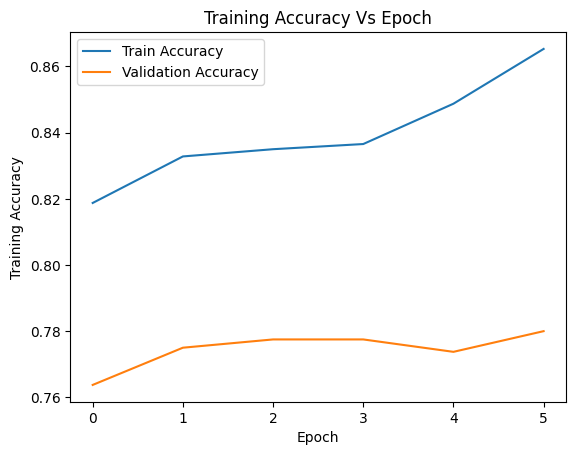

In [91]:
# Training Accuracy Vs Epoch
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy Vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

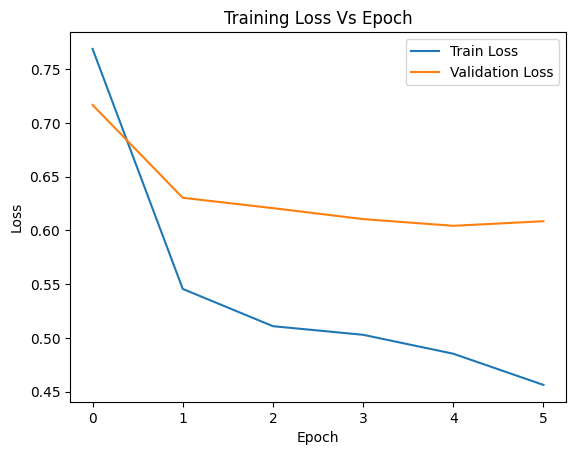

In [92]:
# Training Loss Vs Epoch
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss Vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
# Evaluting model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy with best hyperparameters: {accuracy*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.7697 - loss: 0.6178
Test Accuracy with best hyperparameters: 78.20%


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step


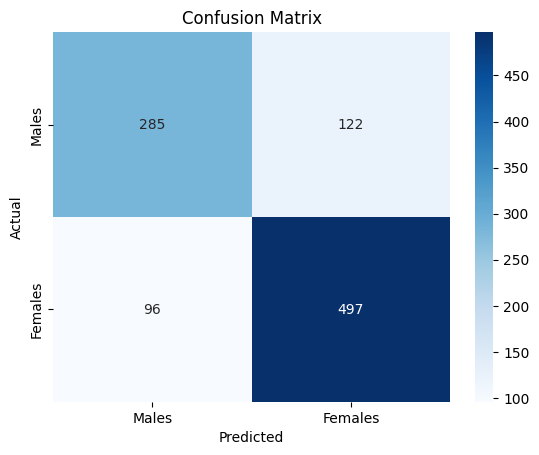

In [94]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (best_model.predict(X_test) > 0.5).astype('int32')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Males', 'Females'],
            yticklabels=['Males', 'Females'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step


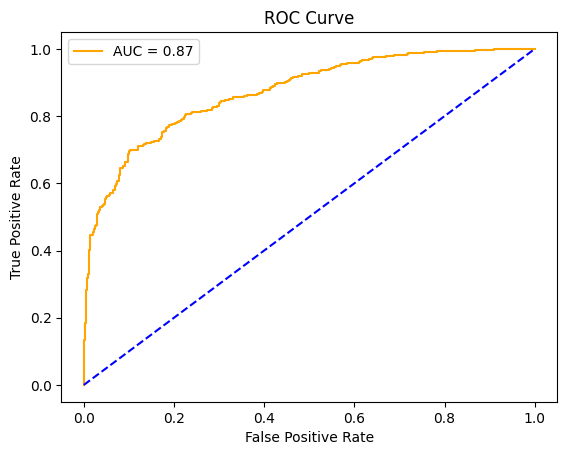

In [95]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_prob = best_model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr , color='orange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'b--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

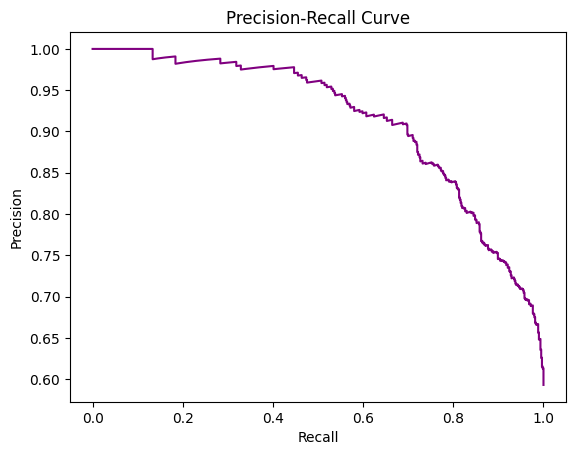

In [97]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [98]:
# Saving model
best_model.save('/content/drive/My Drive/Dl Models/CNN/best_gender_model.h5')
print("Model saved successfully!")

Model saved successfully!
